## **EJEMPLO DE RECONOCIMIENTO DE IMAGENES DE PRENDAS**

### MODELO DE CAPAS DENSAMENTE CONECTADAS

In [45]:
# Cargando librerias

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense,Flatten


#### **Fuente de datos**

In [46]:
F_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = F_mnist.load_data()
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

*Visualizacion de los Items*

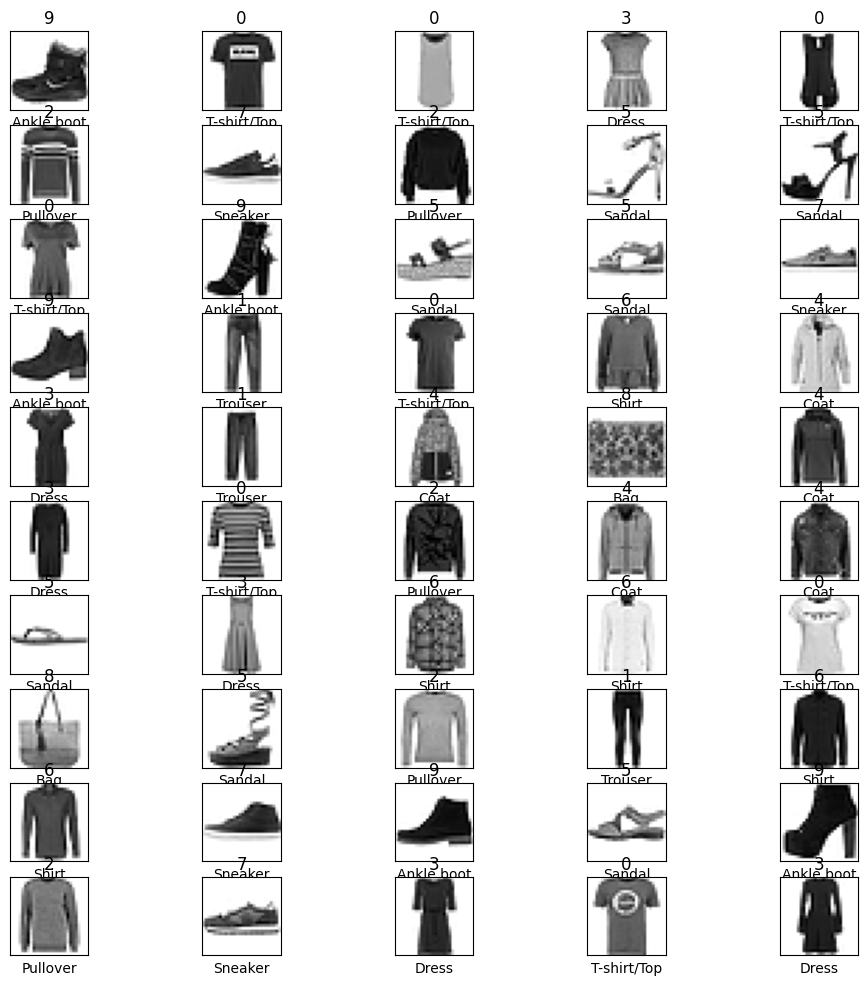

In [47]:
plt.figure(figsize=(12,12))

for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### **Preprocesamiento**

In [48]:
# Se convierte el tipo de dato de las imagenes

x_train1 = x_train.astype('float32')
x_test1 = x_test.astype('float32')

# Se escalan los valores de las imagenes a un rango de 0 a 1
x_train1=x_train1/255
x_test1=x_test1/255

# Se verifican tamaños de los arreglos

print('Dimensiones del arreglo de entrenamiento: ',x_train1.shape)
print('Dimensiones del arreglo de prueba: ',x_test1.shape)
print('Longitud vector de etiquetas en el set de entrenamiento: ',len(y_train))
print('Longitud vector de etiquetas en el set de prueba: ',len(y_test))

Dimensiones del arreglo de entrenamiento:  (60000, 28, 28)
Dimensiones del arreglo de prueba:  (10000, 28, 28)
Longitud vector de etiquetas en el set de entrenamiento:  60000
Longitud vector de etiquetas en el set de prueba:  10000


#### **Definición del modelo**

In [49]:
# Declaración del primer modelo


Modelo_01=Sequential()
Modelo_01.add(Flatten(input_shape=(28,28)))
Modelo_01.add(Dense(10,activation='sigmoid'))
Modelo_01.add(Dense(10,activation='softmax'))

Modelo_01.summary()

Model: "sequential_5"
┌──────────────────────────────────────┬─────────────────────────────┬─────────────────┐
│ Layer (type)                         │ Output Shape                │         Param # │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
 Total params: 7,960 (31.09 KB)
 Trainable params: 7,960 (31.09 KB)
 Non-trainable params: 0 (0.00 B)


C:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Configuracion del modelo**

In [50]:
# sgd: Stochastic gradient descent
Modelo_01.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### **Entrenamiento y Evaluacion**

In [51]:
Modelo_01.fit(x_train1,y_train,epochs=5)

test_loss, test_acc = Modelo_01.evaluate(x_test1,  y_test, verbose=2)

print('\nPrecision del modelo:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6015 - loss: 1.3851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8175 - loss: 0.5877
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8379 - loss: 0.4871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8471 - loss: 0.4472
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8502 - loss: 0.4303
313/313 - 1s - 3ms/step - accuracy: 0.8420 - loss: 0.4553

Precision del modelo: 0.8420000076293945


#### **Predicciones del modelo**

In [52]:
# Se calculan los valores predichos por el modelo
Predicciones=Modelo_01.predict(x_test)

# Un valor en particular

i=8
print('Predicción: ',class_names[np.argmax(Predicciones[i])])
print('Etiqueta verdadera: ',class_names[y_test[i]])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción:  Sneaker
Etiqueta verdadera:  Sandal


### **MODELO DE REDES NEURONALES CONVOLUCIONALES**

In [53]:
# Carga de librerias requeridas

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

#### **Preprocesamiento**

In [54]:
# Conversion de los arreglos a dimension 3

print(x_train.shape)
x_train2=x_train.reshape(60000,28,28,1)
x_test2=x_test.reshape(10000,28,28,1)
print(x_train2.shape)


# Se convierte el tipo de dato de las imagenes
x_train2 = x_train2.astype('float32')/255
x_test2 = x_test2.astype('float32')/255



(60000, 28, 28)
(60000, 28, 28, 1)


#### **Definición del Modelo**

In [55]:
# Declaración del primer modelo


Modelo_02=Sequential()
Modelo_02.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
Modelo_02.add(MaxPooling2D((2,2)))
Modelo_02.add(Conv2D(64,(5,5),activation='relu'))
Modelo_02.add(MaxPooling2D((2,2)))
Modelo_02.add(Flatten())
Modelo_02.add(Dense(10,activation='softmax'))
Modelo_02.summary()

Model: "sequential_6"
┌──────────────────────────────────────┬─────────────────────────────┬─────────────────┐
│ Layer (type)                         │ Output Shape                │         Param # │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤

C:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Configuración del modelo**

In [56]:
Modelo_02.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#### **Entrenamiento y Evaluacion del Modelo**

In [57]:
print(x_test2.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000,)


In [59]:
Modelo_02.fit(x_train2,y_train,batch_size=100,epochs=10)

test_loss, test_acc=Modelo_02.evaluate(x_test2,y_test)
print('Precision en el conjunto de prueba: ', test_acc)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8292 - loss: 0.4767
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8371 - loss: 0.4618
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8427 - loss: 0.4444
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8448 - loss: 0.4365
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8498 - loss: 0.4218
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8565 - loss: 0.4056
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8595 - loss: 0.3977
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8603 - loss: 0.3908
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8625 - loss: 0.3838
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8648 - loss: 0.3791
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8650 - loss: 0.3895
Precision en el conjunto de prueba:  0.86220

un modelo mas incluyendo mas neuronas  y capas

In [60]:
# Declaración del primer modelo


Modelo_03=Sequential()
Modelo_03.add(Conv2D(64,(7,7),activation='relu',padding='same',input_shape=(28,28,1)))
Modelo_03.add(MaxPooling2D((2,2)))
Modelo_03.add(Conv2D(128,(3,3),activation='relu',padding='same'))
Modelo_03.add(MaxPooling2D((2,2)))
Modelo_03.add(Flatten())
Modelo_03.add(Dense(64,activation='relu'))
Modelo_03.add(Dense(10,activation='softmax'))
Modelo_03.summary()

Model: "sequential_7"
┌──────────────────────────────────────┬─────────────────────────────┬─────────────────┐
│ Layer (type)                         │ Output Shape                │         Param # │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤

C:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
Modelo_03.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Modelo_03.fit(x_train2,y_train,batch_size=100,epochs=5)

test_loss, test_acc=Modelo_02.evaluate(x_test2,y_test)
print('Precision en el conjunto de prueba: ', test_acc)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.5410 - loss: 1.4814
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.7580 - loss: 0.6718
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.7915 - loss: 0.5712
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.8107 - loss: 0.5164
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.8271 - loss: 0.4784
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8650 - loss: 0.3895
Precision en el conjunto de prueba:  0.8622000217437744


A pesar del aumento de parametros entrenables no se obtiene una mejora en precision.